# Machine Learning

## 0. Database Connect

In [131]:
# Load packages
from mysql.connector import connection
from sqlalchemy import create_engine
import pandas as pd

# Database connection info
dsn_database = "property" #'demographic' or 'property'
dsn_hostname = "georgetownanalyticscapstone.c50pz9jksixq.us-east-1.rds.amazonaws.com"
dsn_port = 3306
dsn_uid = "sanemkabaca"
dsn_pwd = "georgetowndmv"


# Make connection to database
db_connection = connection.MySQLConnection(user=dsn_uid, password=dsn_pwd,
                                 host=dsn_hostname,
                                 database=dsn_database)

# Make query
query = ("""SELECT * FROM full_dataset""")

# Read data from query
df_original = pd.read_sql(query, con=db_connection)

## 1. Machine Learning Setup

In [132]:
###############################################################################
#                           Import Packages                                   #
###############################################################################

# Import packages
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LinearRegression, LassoCV, RidgeCV, ElasticNetCV, SGDRegressor
from sklearn.svm import LinearSVR, NuSVR, SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from yellowbrick.regressor import PredictionError, ResidualsPlot, AlphaSelection
from sklearn.metrics import mean_squared_error as mse, r2_score
%matplotlib inline

# Ignore warnings in the Notebook
import warnings
warnings.filterwarnings('ignore')

###############################################################################
#                         Remove rows with NA                                 #
###############################################################################

# Remove rows with NA rent and create a single column for rent and square footage
df = df_original.loc[pd.isnull(df_original.minrent) == False,]
df["rent"] = (df.minrent + df.maxrent)/2
df["sqft"] = (pd.to_numeric(df.minsqft) + pd.to_numeric(df.maxsqft))/2

###############################################################################
#                              Keep Outliers                                  #
###############################################################################

# Keep outliers
df_with_outliers = df

# Get target
y_with_outliers = df.rent

###############################################################################
#                              Remove Outliers                                #
###############################################################################

# Remove some outliers (rent >= 6000) 
df_without_outliers = df.loc[df.rent <= 6000, :]

# Get target
y_without_outliers = df_without_outliers.rent

###############################################################################
#                     Remove Unnecessary Columns                              #
###############################################################################

# Columns to remove that we don't need for prediction
Columns_To_Remove = ["unit_id", "pid", "property_name", "zip_code", 
                     "parent_company_name", "zip", "minrent", "maxrent", "minsqft", "maxsqft",
                     "rent"]
cols = [col for col in df.columns if col not in Columns_To_Remove]
df_for_ml_with_outliers = df_with_outliers[cols]
df_for_ml_without_outliers = df_without_outliers[cols]
del(Columns_To_Remove, cols)

###############################################################################
#                     Force columns to be numeric                             #
###############################################################################

# Make all columns numeric
df_for_ml_with_outliers[df_for_ml_with_outliers.columns] = df_for_ml_with_outliers[
    df_for_ml_with_outliers.columns].apply(pd.to_numeric, errors = 'coerce')

df_for_ml_without_outliers[df_for_ml_without_outliers.columns] = df_for_ml_without_outliers[
    df_for_ml_without_outliers.columns].apply(pd.to_numeric, errors = 'coerce')

###############################################################################
#                          Train Test Split                                   #
###############################################################################

# Train - Test - Split

# WITH OUTLIERS - Train/Test/Split
X_train1, X_test1, y_train1, y_test1 = train_test_split(df_for_ml_with_outliers, y_with_outliers, 
                                                        test_size=0.33, random_state=42)

# WITHOUT OUTLIERS - Train/Test/Split
X_train2, X_test2, y_train2, y_test2 = train_test_split(df_for_ml_without_outliers, y_without_outliers, 
                                                        test_size=0.33, random_state=42)


###############################################################################
#                          Other Code Stuff                                   #
###############################################################################

# Other random code that I'm not sure where to put
#expected = y_test
#predicted = RF.predict(X_test)
#print("Random Forest model")
#print("Mean squared error = %0.3f" % mse(expected, predicted))
#print("R2 score = %0.3f" % r2_score(expected, predicted))
#names = list(df_for_ml.columns)
#print("Features sorted by their score:")
#print(sorted(zip(map(lambda x: round(x, 4), RF.feature_importances_), 
#                 names), reverse=True))

## 2. Linear Models

### 2.1 Linear Regression

With Outliers


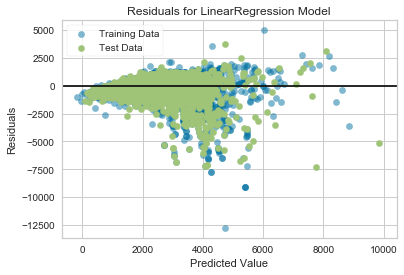

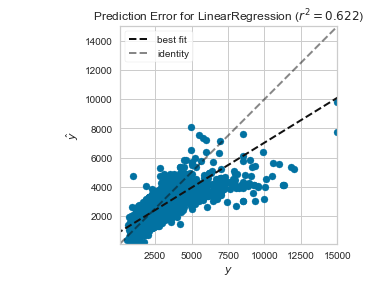

Without Outliers


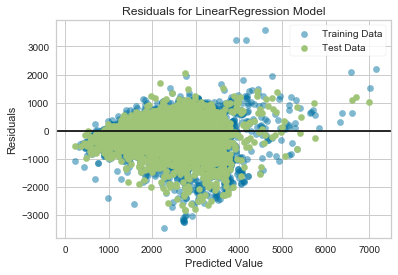

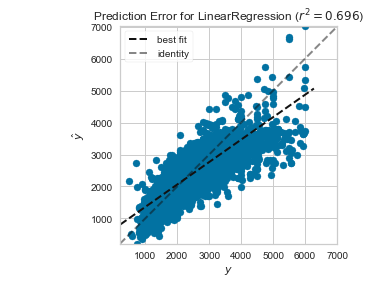

In [103]:
############################################################
#                        WITH OUTLIERS                     #
############################################################

# Fit Model with outliers
LinRegr = LinearRegression()
LinRegr.fit(X_train1, y_train1)

print("With Outliers")

# Visualization 1 - Residual Plot
visualizer = ResidualsPlot(LinRegr)

visualizer.fit(X_train1, y_train1)  # Fit the training data to the visualizer
visualizer.score(X_test1, y_test1)  # Evaluate the model on the test data
g = visualizer.poof()

# Visualization 2 - Prediction Error Plot
visualizer = PredictionError(LinRegr)

visualizer.fit(X_train1, y_train1)  # Fit the training data to the visualizer
visualizer.score(X_test1, y_test1)  # Evaluate the model on the test data
g = visualizer.poof() 

############################################################
#                     WITHOUT OUTLIERS                     #
############################################################

# Fit Model without outliers
LinRegr = LinearRegression()
LinRegr.fit(X_train2, y_train2)

print("Without Outliers")

# Visualization 1 - Residual Plot
visualizer = ResidualsPlot(LinRegr)

visualizer.fit(X_train2, y_train2)  # Fit the training data to the visualizer
visualizer.score(X_test2, y_test2)  # Evaluate the model on the test data
g = visualizer.poof()

# Visualization 2 - Prediction Error Plot
visualizer = PredictionError(LinRegr)

visualizer.fit(X_train2, y_train2)  # Fit the training data to the visualizer
visualizer.score(X_test2, y_test2)  # Evaluate the model on the test data
g = visualizer.poof() 

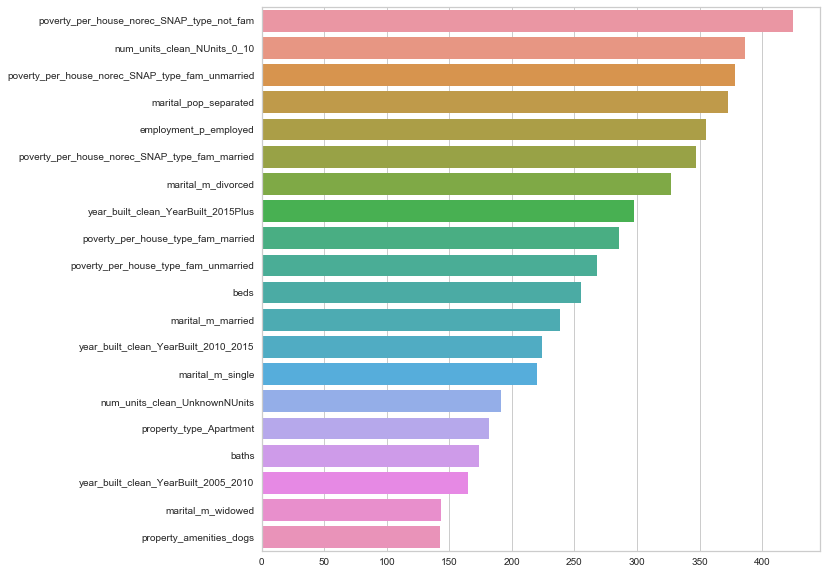

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

coefficients = LinRegr.coef_
Top10 = np.argsort(coefficients)[::-1][0:20]
Top10_Features = X_train2.columns[Top10]
Top10_Importances = coefficients[Top10]
Top10_Importances
plt.figure(figsize=(10, 10))
sns.barplot(x = Top10_Importances, y = Top10_Features)

### 2.2 Lasso Regression

With Outliers


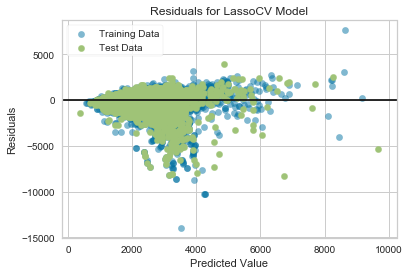

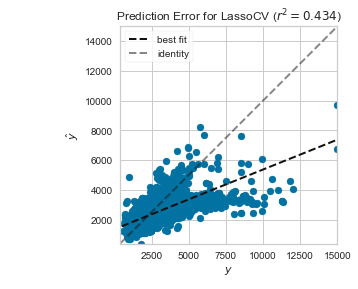

Without Outliers


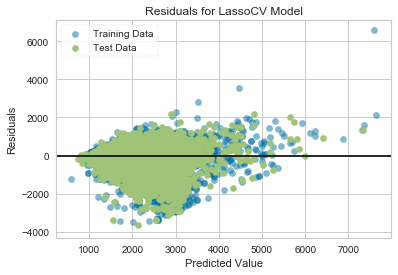

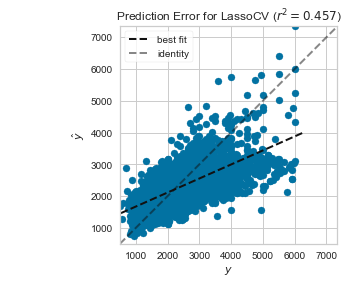

In [105]:
############################################################
#                        WITH OUTLIERS                     #
############################################################

# Fit Model with outliers
LassoRegr = LassoCV()
LassoRegr.fit(X_train1, y_train1)

print("With Outliers")

# Visualization 1 - Residual Plot
visualizer = ResidualsPlot(LassoRegr)

visualizer.fit(X_train1, y_train1)  # Fit the training data to the visualizer
visualizer.score(X_test1, y_test1)  # Evaluate the model on the test data
g = visualizer.poof()

# Visualization 2 - Prediction Error Plot
visualizer = PredictionError(LassoRegr)

visualizer.fit(X_train1, y_train1)  # Fit the training data to the visualizer
visualizer.score(X_test1, y_test1)  # Evaluate the model on the test data
g = visualizer.poof() 

############################################################
#                     WITHOUT OUTLIERS                     #
############################################################

# Fit Model without outliers
LassoRegr = LassoCV()
LassoRegr.fit(X_train2, y_train2)

print("Without Outliers")

# Visualization 1 - Residual Plot
visualizer = ResidualsPlot(LassoRegr)

visualizer.fit(X_train2, y_train2)  # Fit the training data to the visualizer
visualizer.score(X_test2, y_test2)  # Evaluate the model on the test data
g = visualizer.poof()

# Visualization 2 - Prediction Error Plot
visualizer = PredictionError(LassoRegr)

visualizer.fit(X_train2, y_train2)  # Fit the training data to the visualizer
visualizer.score(X_test2, y_test2)  # Evaluate the model on the test data
g = visualizer.poof() 

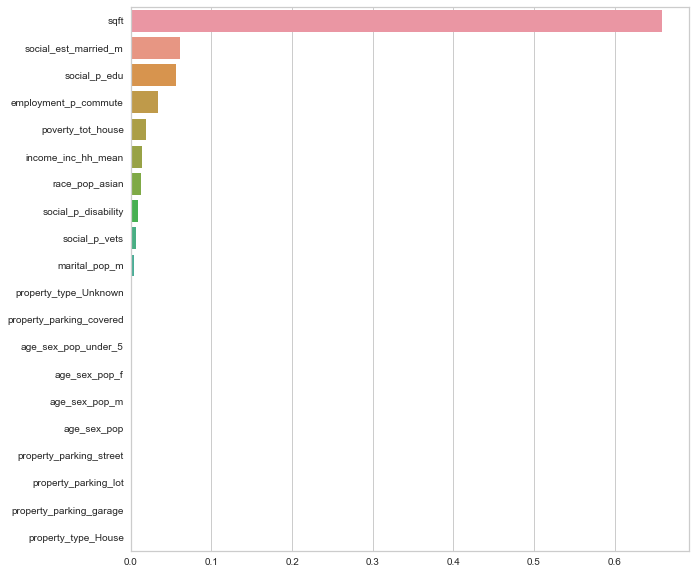

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

coefficients = LassoRegr.coef_
Top10 = np.argsort(coefficients)[::-1][0:20]
Top10_Features = X_train2.columns[Top10]
Top10_Importances = coefficients[Top10]
Top10_Importances
plt.figure(figsize=(10, 10))
sns.barplot(x = Top10_Importances, y = Top10_Features)

### 2.3 Ridge Regression

With Outliers


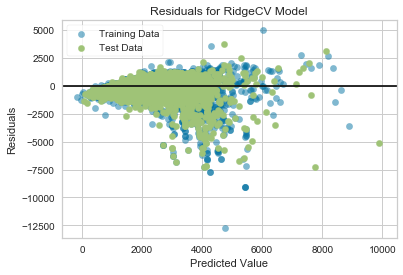

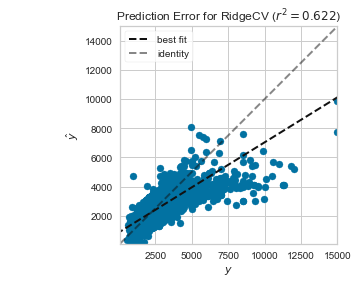

Without Outliers


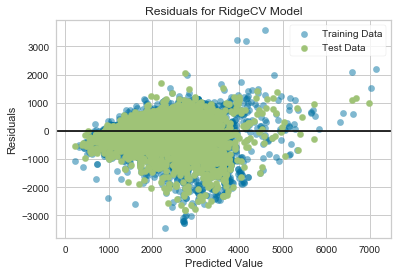

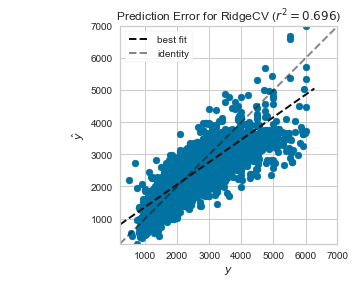

In [107]:
############################################################
#                        WITH OUTLIERS                     #
############################################################

# Fit Model with outliers
RidgeRegr = RidgeCV()
RidgeRegr.fit(X_train1, y_train1)

print("With Outliers")

# Visualization 1 - Residual Plot
visualizer = ResidualsPlot(RidgeRegr)

visualizer.fit(X_train1, y_train1)  # Fit the training data to the visualizer
visualizer.score(X_test1, y_test1)  # Evaluate the model on the test data
g = visualizer.poof()

# Visualization 2 - Prediction Error Plot
visualizer = PredictionError(RidgeRegr)

visualizer.fit(X_train1, y_train1)  # Fit the training data to the visualizer
visualizer.score(X_test1, y_test1)  # Evaluate the model on the test data
g = visualizer.poof() 

############################################################
#                     WITHOUT OUTLIERS                     #
############################################################

# Fit Model without outliers
RidgeRegr = RidgeCV()
RidgeRegr.fit(X_train2, y_train2)

print("Without Outliers")

# Visualization 1 - Residual Plot
visualizer = ResidualsPlot(RidgeRegr)

visualizer.fit(X_train2, y_train2)  # Fit the training data to the visualizer
visualizer.score(X_test2, y_test2)  # Evaluate the model on the test data
g = visualizer.poof()

# Visualization 2 - Prediction Error Plot
visualizer = PredictionError(RidgeRegr)

visualizer.fit(X_train2, y_train2)  # Fit the training data to the visualizer
visualizer.score(X_test2, y_test2)  # Evaluate the model on the test data
g = visualizer.poof() 

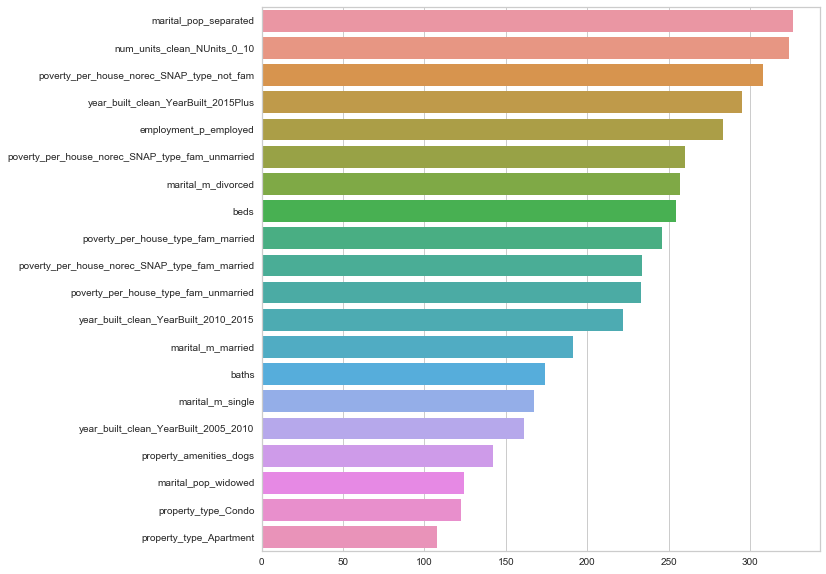

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

coefficients = RidgeRegr.coef_
Top10 = np.argsort(coefficients)[::-1][0:20]
Top10_Features = X_train2.columns[Top10]
Top10_Importances = coefficients[Top10]
Top10_Importances
plt.figure(figsize=(10, 10))
sns.barplot(x = Top10_Importances, y = Top10_Features)

### 2.4 ElasticNet Regression

With Outliers


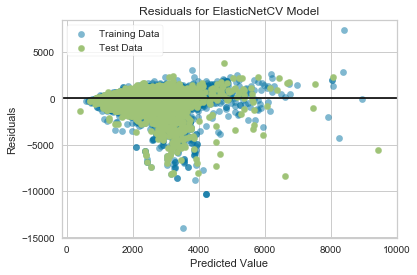

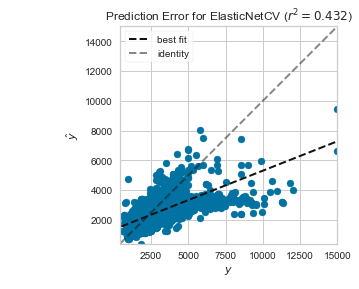

Without Outliers


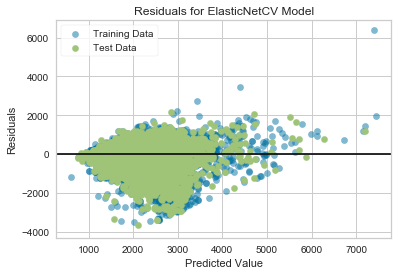

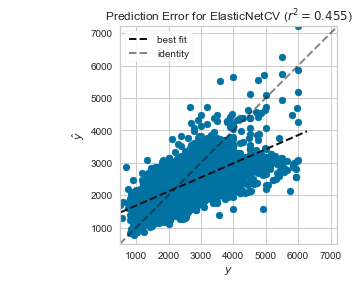

In [109]:
############################################################
#                        WITH OUTLIERS                     #
############################################################

# Fit Model with outliers
ElasticNetRegr = ElasticNetCV()
ElasticNetRegr.fit(X_train1, y_train1)

print("With Outliers")

# Visualization 1 - Residual Plot
visualizer = ResidualsPlot(ElasticNetRegr)

visualizer.fit(X_train1, y_train1)  # Fit the training data to the visualizer
visualizer.score(X_test1, y_test1)  # Evaluate the model on the test data
g = visualizer.poof()

# Visualization 2 - Prediction Error Plot
visualizer = PredictionError(ElasticNetRegr)

visualizer.fit(X_train1, y_train1)  # Fit the training data to the visualizer
visualizer.score(X_test1, y_test1)  # Evaluate the model on the test data
g = visualizer.poof() 

############################################################
#                     WITHOUT OUTLIERS                     #
############################################################

# Fit Model without outliers
ElasticNetRegr = ElasticNetCV()
ElasticNetRegr.fit(X_train2, y_train2)

print("Without Outliers")

# Visualization 1 - Residual Plot
visualizer = ResidualsPlot(ElasticNetRegr)

visualizer.fit(X_train2, y_train2)  # Fit the training data to the visualizer
visualizer.score(X_test2, y_test2)  # Evaluate the model on the test data
g = visualizer.poof()

# Visualization 2 - Prediction Error Plot
visualizer = PredictionError(ElasticNetRegr)

visualizer.fit(X_train2, y_train2)  # Fit the training data to the visualizer
visualizer.score(X_test2, y_test2)  # Evaluate the model on the test data
g = visualizer.poof() 

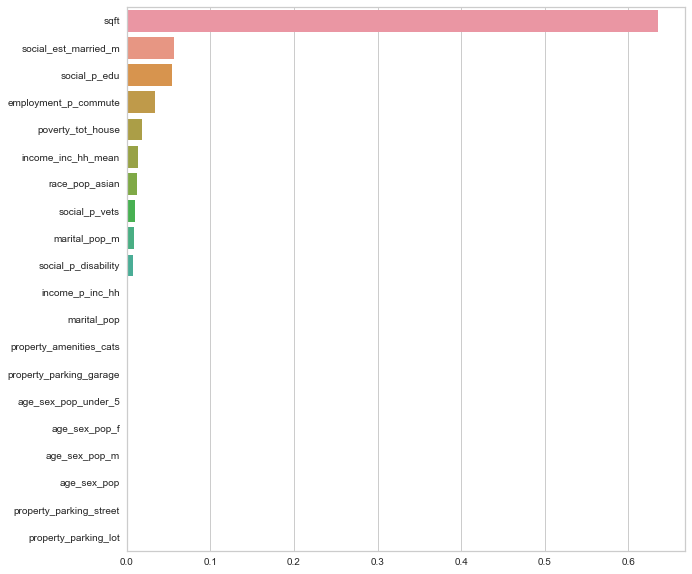

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

coefficients = ElasticNetRegr.coef_
Top10 = np.argsort(coefficients)[::-1][0:20]
Top10_Features = X_train2.columns[Top10]
Top10_Importances = coefficients[Top10]
Top10_Importances
plt.figure(figsize=(10, 10))
sns.barplot(x = Top10_Importances, y = Top10_Features)

## 3. SVM Models

### 3.1 Linear SVR

With Outliers


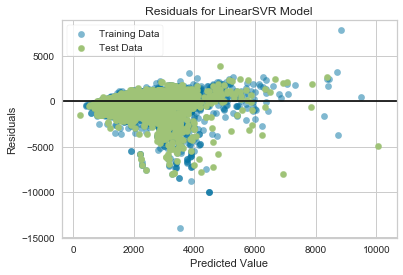

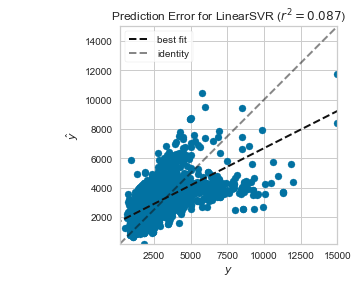

Without Outliers


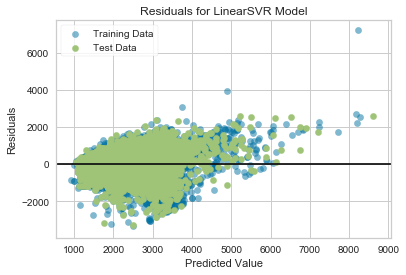

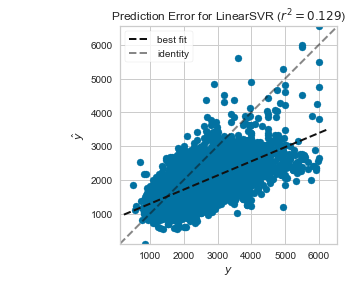

In [111]:
############################################################
#                        WITH OUTLIERS                     #
############################################################

# Fit Model with outliers
LinSVR = LinearSVR()
LinSVR.fit(X_train1, y_train1)

print("With Outliers")

# Visualization 1 - Residual Plot
visualizer = ResidualsPlot(LinSVR)

visualizer.fit(X_train1, y_train1)  # Fit the training data to the visualizer
visualizer.score(X_test1, y_test1)  # Evaluate the model on the test data
g = visualizer.poof()

# Visualization 2 - Prediction Error Plot
visualizer = PredictionError(LinSVR)

visualizer.fit(X_train1, y_train1)  # Fit the training data to the visualizer
visualizer.score(X_test1, y_test1)  # Evaluate the model on the test data
g = visualizer.poof() 

############################################################
#                     WITHOUT OUTLIERS                     #
############################################################

# Fit Model without outliers
LinSVR = LinearSVR()
LinSVR.fit(X_train2, y_train2)

print("Without Outliers")

# Visualization 1 - Residual Plot
visualizer = ResidualsPlot(LinSVR)

visualizer.fit(X_train2, y_train2)  # Fit the training data to the visualizer
visualizer.score(X_test2, y_test2)  # Evaluate the model on the test data
g = visualizer.poof()

# Visualization 2 - Prediction Error Plot
visualizer = PredictionError(LinSVR)

visualizer.fit(X_train2, y_train2)  # Fit the training data to the visualizer
visualizer.score(X_test2, y_test2)  # Evaluate the model on the test data
g = visualizer.poof() 

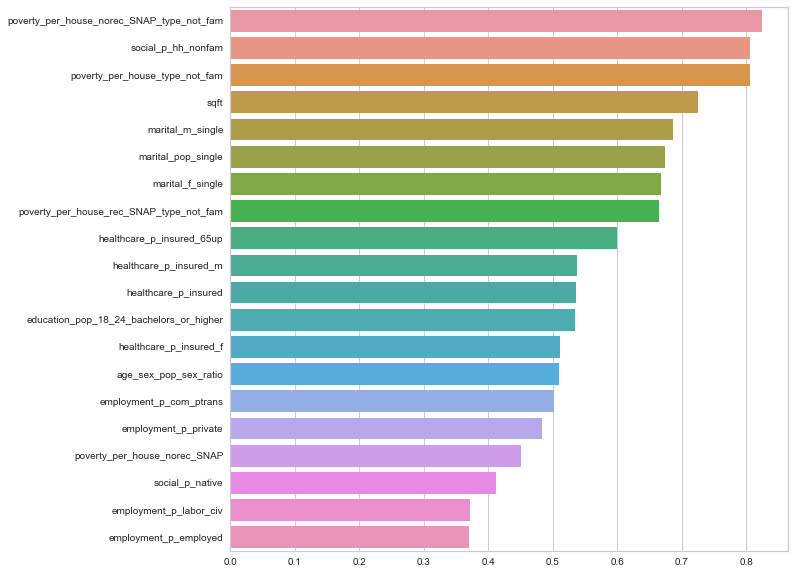

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

coefficients = LinSVR.coef_
Top10 = np.argsort(coefficients)[::-1][0:20]
Top10_Features = X_train2.columns[Top10]
Top10_Importances = coefficients[Top10]
Top10_Importances
plt.figure(figsize=(10, 10))
sns.barplot(x = Top10_Importances, y = Top10_Features)

### 3.2 Nu SVR

With Outliers


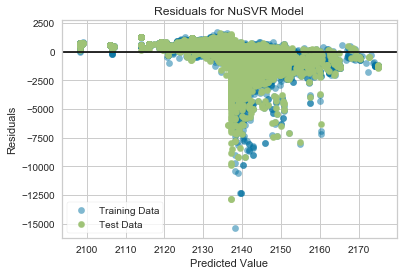

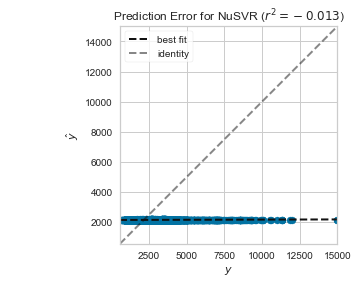

Without Outliers


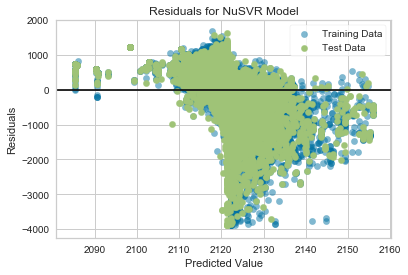

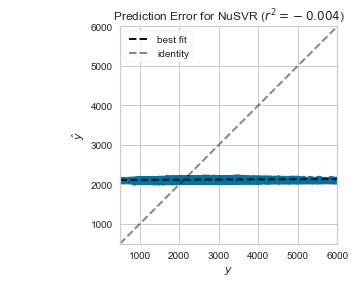

In [113]:
############################################################
#                        WITH OUTLIERS                     #
############################################################

# Fit Model with outliers
Nu_SVR = NuSVR()
Nu_SVR.fit(X_train1, y_train1)

print("With Outliers")

# Visualization 1 - Residual Plot
visualizer = ResidualsPlot(Nu_SVR)

visualizer.fit(X_train1, y_train1)  # Fit the training data to the visualizer
visualizer.score(X_test1, y_test1)  # Evaluate the model on the test data
g = visualizer.poof()

# Visualization 2 - Prediction Error Plot
visualizer = PredictionError(Nu_SVR)

visualizer.fit(X_train1, y_train1)  # Fit the training data to the visualizer
visualizer.score(X_test1, y_test1)  # Evaluate the model on the test data
g = visualizer.poof() 

############################################################
#                     WITHOUT OUTLIERS                     #
############################################################

# Fit Model without outliers
Nu_SVR = NuSVR()
Nu_SVR.fit(X_train2, y_train2)

print("Without Outliers")

# Visualization 1 - Residual Plot
visualizer = ResidualsPlot(Nu_SVR)

visualizer.fit(X_train2, y_train2)  # Fit the training data to the visualizer
visualizer.score(X_test2, y_test2)  # Evaluate the model on the test data
g = visualizer.poof()

# Visualization 2 - Prediction Error Plot
visualizer = PredictionError(Nu_SVR)

visualizer.fit(X_train2, y_train2)  # Fit the training data to the visualizer
visualizer.score(X_test2, y_test2)  # Evaluate the model on the test data
g = visualizer.poof() 

### 3.3 SVR Regression

With Outliers


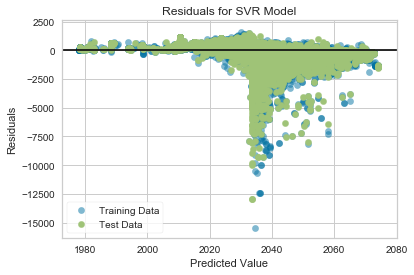

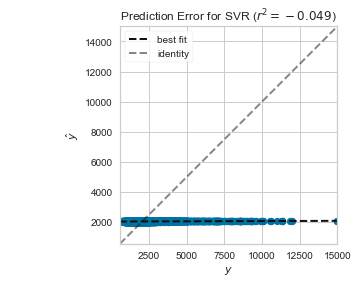

Without Outliers


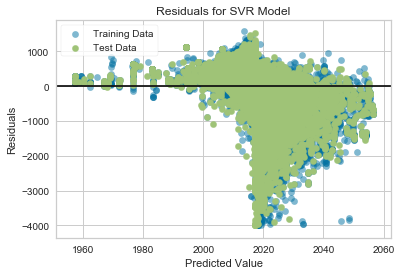

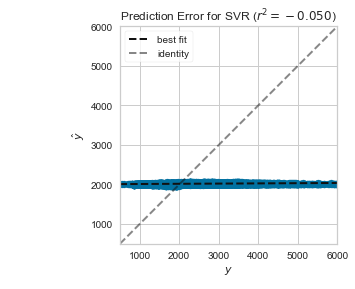

In [114]:
############################################################
#                        WITH OUTLIERS                     #
############################################################

# Fit Model with outliers
SVR_Regr = SVR()
SVR_Regr.fit(X_train1, y_train1)

print("With Outliers")

# Visualization 1 - Residual Plot
visualizer = ResidualsPlot(SVR_Regr)

visualizer.fit(X_train1, y_train1)  # Fit the training data to the visualizer
visualizer.score(X_test1, y_test1)  # Evaluate the model on the test data
g = visualizer.poof()

# Visualization 2 - Prediction Error Plot
visualizer = PredictionError(SVR_Regr)

visualizer.fit(X_train1, y_train1)  # Fit the training data to the visualizer
visualizer.score(X_test1, y_test1)  # Evaluate the model on the test data
g = visualizer.poof() 

############################################################
#                     WITHOUT OUTLIERS                     #
############################################################

# Fit Model without outliers
SVR_Regr = SVR()
SVR_Regr.fit(X_train2, y_train2)

print("Without Outliers")

# Visualization 1 - Residual Plot
visualizer = ResidualsPlot(SVR_Regr)

visualizer.fit(X_train2, y_train2)  # Fit the training data to the visualizer
visualizer.score(X_test2, y_test2)  # Evaluate the model on the test data
g = visualizer.poof()

# Visualization 2 - Prediction Error Plot
visualizer = PredictionError(SVR_Regr)

visualizer.fit(X_train2, y_train2)  # Fit the training data to the visualizer
visualizer.score(X_test2, y_test2)  # Evaluate the model on the test data
g = visualizer.poof() 

## 4. Ensemble Models

### 4.1 Random Forest Regression

With Outliers


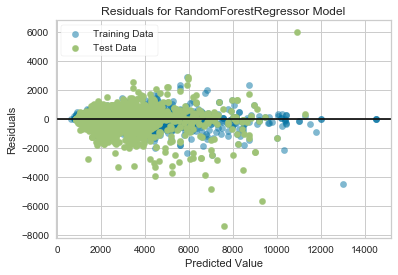

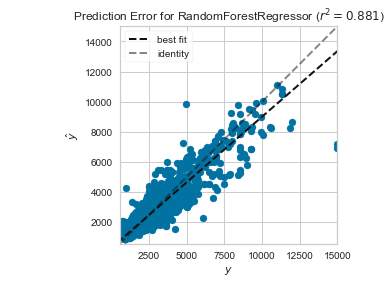

Without Outliers


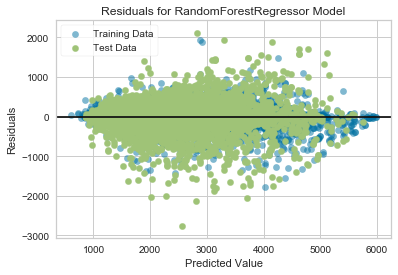

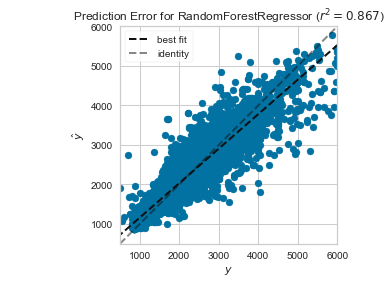

In [115]:
############################################################
#                        WITH OUTLIERS                     #
############################################################

# Fit Model with outliers
RF = RandomForestRegressor()
RF.fit(X_train1, y_train1)

print("With Outliers")

# Visualization 1 - Residual Plot
visualizer = ResidualsPlot(RF)

visualizer.fit(X_train1, y_train1)  # Fit the training data to the visualizer
visualizer.score(X_test1, y_test1)  # Evaluate the model on the test data
g = visualizer.poof()

# Visualization 2 - Prediction Error Plot
visualizer = PredictionError(RF)

visualizer.fit(X_train1, y_train1)  # Fit the training data to the visualizer
visualizer.score(X_test1, y_test1)  # Evaluate the model on the test data
g = visualizer.poof() 

############################################################
#                     WITHOUT OUTLIERS                     #
############################################################

# Fit Model without outliers
RF = RandomForestRegressor()
RF.fit(X_train2, y_train2)

print("Without Outliers")

# Visualization 1 - Residual Plot
visualizer = ResidualsPlot(RF)

visualizer.fit(X_train2, y_train2)  # Fit the training data to the visualizer
visualizer.score(X_test2, y_test2)  # Evaluate the model on the test data
g = visualizer.poof()

# Visualization 2 - Prediction Error Plot
visualizer = PredictionError(RF)

visualizer.fit(X_train2, y_train2)  # Fit the training data to the visualizer
visualizer.score(X_test2, y_test2)  # Evaluate the model on the test data
g = visualizer.poof() 

### Feature Importance of Random Forest Model (w/o outliers)

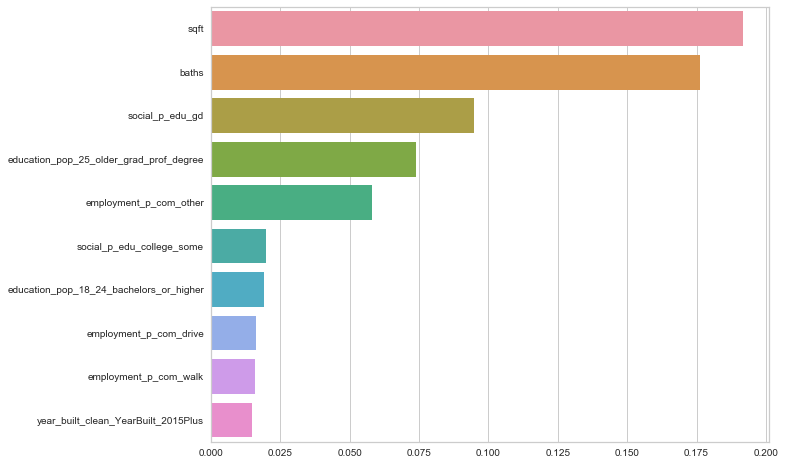

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

importances = RF.feature_importances_
Top10 = np.argsort(importances)[::-1][0:10]
Top10_Features = X_train2.columns[Top10]
Top10_Importances = importances[Top10]
Top10_Importances
plt.figure(figsize=(10, 8))
sns.barplot(x = Top10_Importances, y = Top10_Features)

### 4.2 Ada Boost Regression

With Outliers


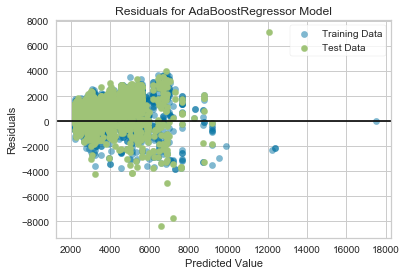

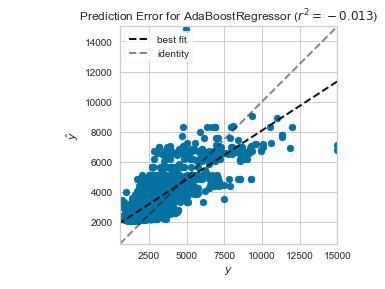

Without Outliers


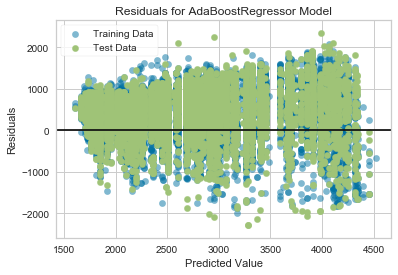

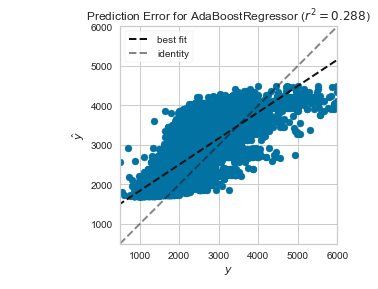

In [117]:
############################################################
#                        WITH OUTLIERS                     #
############################################################

# Fit Model with outliers
ADA_Regr =  AdaBoostRegressor()
ADA_Regr.fit(X_train1, y_train1)

print("With Outliers")

# Visualization 1 - Residual Plot
visualizer = ResidualsPlot(ADA_Regr)

visualizer.fit(X_train1, y_train1)  # Fit the training data to the visualizer
visualizer.score(X_test1, y_test1)  # Evaluate the model on the test data
g = visualizer.poof()

# Visualization 2 - Prediction Error Plot
visualizer = PredictionError(ADA_Regr)

visualizer.fit(X_train1, y_train1)  # Fit the training data to the visualizer
visualizer.score(X_test1, y_test1)  # Evaluate the model on the test data
g = visualizer.poof() 

############################################################
#                     WITHOUT OUTLIERS                     #
############################################################

# Fit Model without outliers
ADA_Regr =  AdaBoostRegressor()
ADA_Regr.fit(X_train2, y_train2)

print("Without Outliers")

# Visualization 1 - Residual Plot
visualizer = ResidualsPlot(ADA_Regr)

visualizer.fit(X_train2, y_train2)  # Fit the training data to the visualizer
visualizer.score(X_test2, y_test2)  # Evaluate the model on the test data
g = visualizer.poof()

# Visualization 2 - Prediction Error Plot
visualizer = PredictionError(ADA_Regr)

visualizer.fit(X_train2, y_train2)  # Fit the training data to the visualizer
visualizer.score(X_test2, y_test2)  # Evaluate the model on the test data
g = visualizer.poof() 

### Feature Importance of Ada Boost Model (w/o outliers)

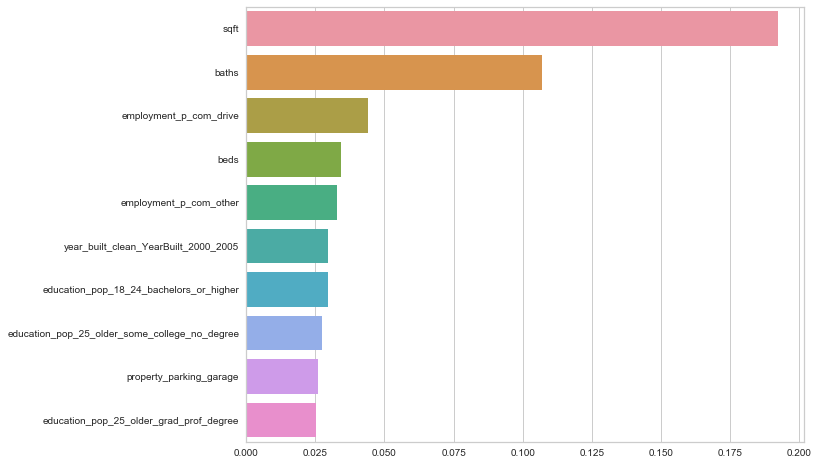

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

importances = ADA_Regr.feature_importances_
Top10 = np.argsort(importances)[::-1][0:10]
Top10_Features = X_train2.columns[Top10]
Top10_Importances = importances[Top10]
Top10_Importances
plt.figure(figsize=(10, 8))
sns.barplot(x = Top10_Importances, y = Top10_Features)

### 4.3 Bagging Regression

With Outliers


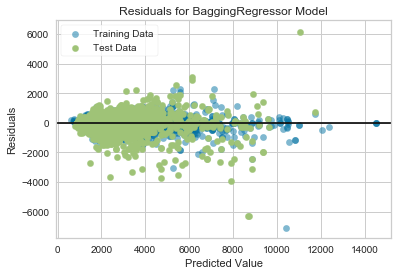

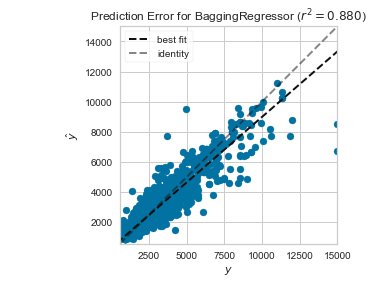

Without Outliers


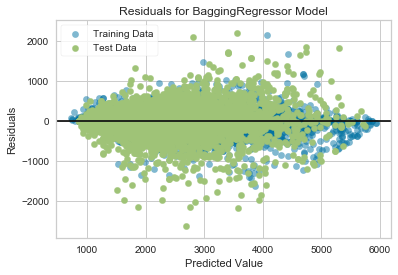

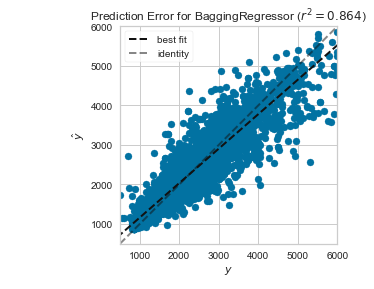

In [119]:
############################################################
#                        WITH OUTLIERS                     #
############################################################

# Fit Model with outliers
Bag_Regr = BaggingRegressor()
Bag_Regr.fit(X_train1, y_train1)

print("With Outliers")

# Visualization 1 - Residual Plot
visualizer = ResidualsPlot(Bag_Regr)

visualizer.fit(X_train1, y_train1)  # Fit the training data to the visualizer
visualizer.score(X_test1, y_test1)  # Evaluate the model on the test data
g = visualizer.poof()

# Visualization 2 - Prediction Error Plot
visualizer = PredictionError(Bag_Regr)

visualizer.fit(X_train1, y_train1)  # Fit the training data to the visualizer
visualizer.score(X_test1, y_test1)  # Evaluate the model on the test data
g = visualizer.poof() 

############################################################
#                     WITHOUT OUTLIERS                     #
############################################################

# Fit Model without outliers
Bag_Regr = BaggingRegressor()
Bag_Regr.fit(X_train2, y_train2)

print("Without Outliers")

# Visualization 1 - Residual Plot
visualizer = ResidualsPlot(Bag_Regr)

visualizer.fit(X_train2, y_train2)  # Fit the training data to the visualizer
visualizer.score(X_test2, y_test2)  # Evaluate the model on the test data
g = visualizer.poof()

# Visualization 2 - Prediction Error Plot
visualizer = PredictionError(Bag_Regr)

visualizer.fit(X_train2, y_train2)  # Fit the training data to the visualizer
visualizer.score(X_test2, y_test2)  # Evaluate the model on the test data
g = visualizer.poof() 

### 4.4 Extra Trees Regression

With Outliers


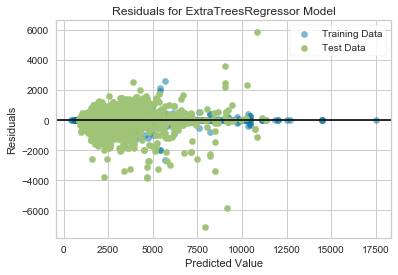

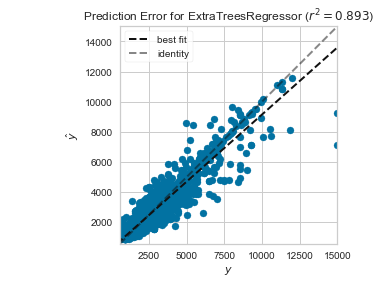

Without Outliers


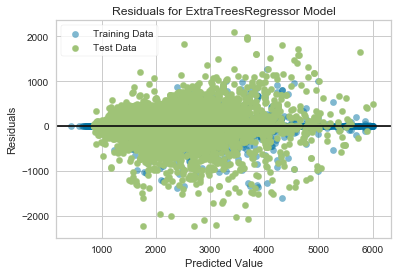

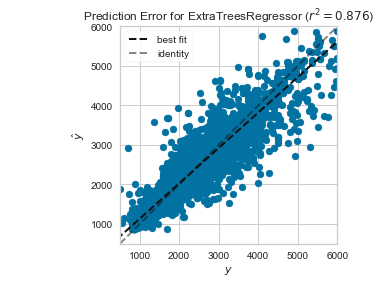

In [120]:
############################################################
#                        WITH OUTLIERS                     #
############################################################

# Fit Model with outliers
XtraTrees = ExtraTreesRegressor()
XtraTrees.fit(X_train1, y_train1)

print("With Outliers")

# Visualization 1 - Residual Plot
visualizer = ResidualsPlot(XtraTrees)

visualizer.fit(X_train1, y_train1)  # Fit the training data to the visualizer
visualizer.score(X_test1, y_test1)  # Evaluate the model on the test data
g = visualizer.poof()

# Visualization 2 - Prediction Error Plot
visualizer = PredictionError(XtraTrees)

visualizer.fit(X_train1, y_train1)  # Fit the training data to the visualizer
visualizer.score(X_test1, y_test1)  # Evaluate the model on the test data
g = visualizer.poof() 

############################################################
#                     WITHOUT OUTLIERS                     #
############################################################

# Fit Model without outliers
XtraTrees = ExtraTreesRegressor()
XtraTrees.fit(X_train2, y_train2)

print("Without Outliers")

# Visualization 1 - Residual Plot
visualizer = ResidualsPlot(XtraTrees)

visualizer.fit(X_train2, y_train2)  # Fit the training data to the visualizer
visualizer.score(X_test2, y_test2)  # Evaluate the model on the test data
g = visualizer.poof()

# Visualization 2 - Prediction Error Plot
visualizer = PredictionError(XtraTrees)

visualizer.fit(X_train2, y_train2)  # Fit the training data to the visualizer
visualizer.score(X_test2, y_test2)  # Evaluate the model on the test data
g = visualizer.poof() 

### Feature Importance of Extra Trees Regression (w/o outliers)

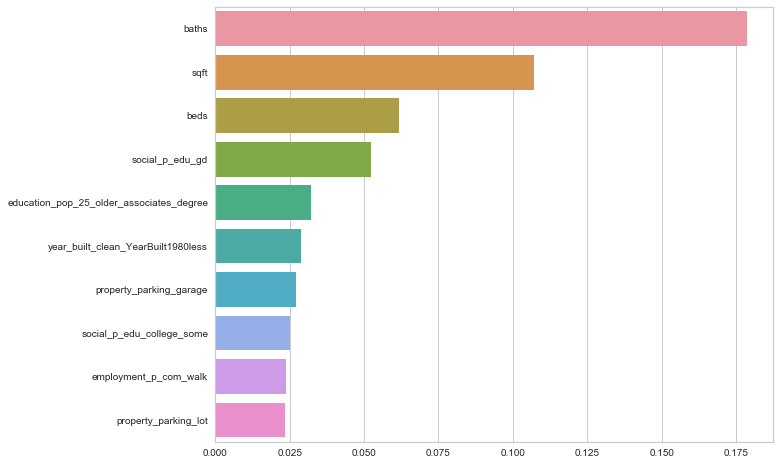

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

importances = XtraTrees.feature_importances_
Top10 = np.argsort(importances)[::-1][0:10]
Top10_Features = X_train2.columns[Top10]
Top10_Importances = importances[Top10]
Top10_Importances
plt.figure(figsize=(10, 8))
sns.barplot(x = Top10_Importances, y = Top10_Features)

### 4.5 Gradient Boosting

With Outliers


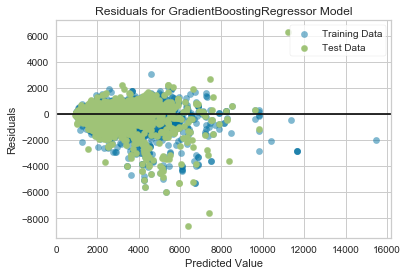

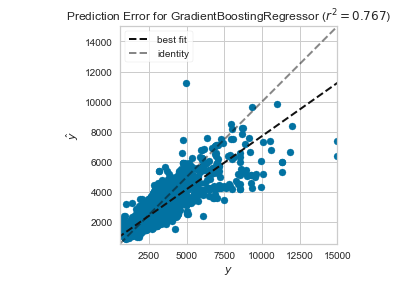

Without Outliers


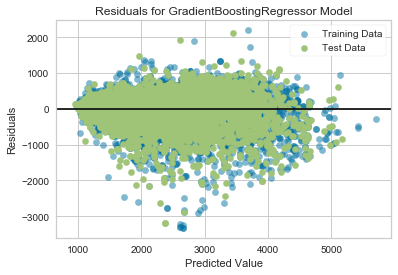

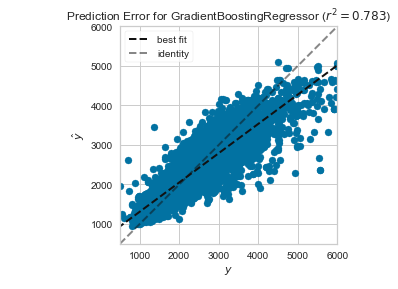

In [122]:
############################################################
#                        WITH OUTLIERS                     #
############################################################

# Fit Model with outliers
GradBoost_Regr = GradientBoostingRegressor()
GradBoost_Regr.fit(X_train1, y_train1)

print("With Outliers")

# Visualization 1 - Residual Plot
visualizer = ResidualsPlot(GradBoost_Regr)

visualizer.fit(X_train1, y_train1)  # Fit the training data to the visualizer
visualizer.score(X_test1, y_test1)  # Evaluate the model on the test data
g = visualizer.poof()

# Visualization 2 - Prediction Error Plot
visualizer = PredictionError(GradBoost_Regr)

visualizer.fit(X_train1, y_train1)  # Fit the training data to the visualizer
visualizer.score(X_test1, y_test1)  # Evaluate the model on the test data
g = visualizer.poof() 

############################################################
#                     WITHOUT OUTLIERS                     #
############################################################

# Fit Model without outliers
GradBoost_Regr = GradientBoostingRegressor()
GradBoost_Regr.fit(X_train2, y_train2)

print("Without Outliers")

# Visualization 1 - Residual Plot
visualizer = ResidualsPlot(GradBoost_Regr)

visualizer.fit(X_train2, y_train2)  # Fit the training data to the visualizer
visualizer.score(X_test2, y_test2)  # Evaluate the model on the test data
g = visualizer.poof()

# Visualization 2 - Prediction Error Plot
visualizer = PredictionError(GradBoost_Regr)

visualizer.fit(X_train2, y_train2)  # Fit the training data to the visualizer
visualizer.score(X_test2, y_test2)  # Evaluate the model on the test data
g = visualizer.poof() 

### Feature Importance of Gradient Boosting Model (w/o outliers)

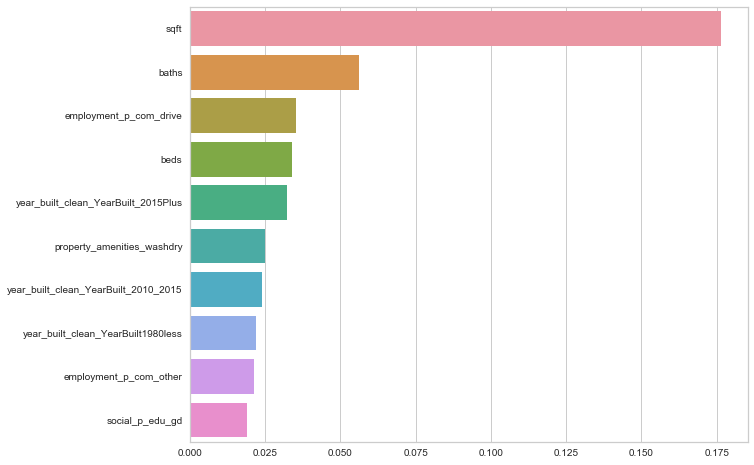

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

importances = GradBoost_Regr.feature_importances_
Top10 = np.argsort(importances)[::-1][0:10]
Top10_Features = X_train2.columns[Top10]
Top10_Importances = importances[Top10]
Top10_Importances
plt.figure(figsize=(10, 8))
sns.barplot(x = Top10_Importances, y = Top10_Features)

# Cross Validation to check for overfitting on the best model(s)?

In [124]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
# Fit Model
#scores = cross_val_score(LinSVR, X_train1, y_train1, cv=12)

In [125]:
RF = RandomForestRegressor()
cross_validate(RF, X = X_train2, y = y_train2, cv = 12)

{'fit_time': array([ 6.7830627 ,  6.79908872,  6.73391747,  6.88030601,  6.74992466,
         6.79106641,  6.79410839,  6.84518147,  6.76599956,  6.76095462,
         6.75293326,  6.72786951]),
 'score_time': array([ 0.00902557,  0.00902414,  0.01102901,  0.00802159,  0.00802183,
         0.00802183,  0.00801373,  0.00704527,  0.00801778,  0.00902271,
         0.00905108,  0.00802183]),
 'test_score': array([ 0.84641297,  0.85550647,  0.86558909,  0.84104226,  0.86152791,
         0.87085335,  0.85995962,  0.87446348,  0.86415896,  0.86335487,
         0.868453  ,  0.85468998]),
 'train_score': array([ 0.96533517,  0.96517343,  0.96619294,  0.96752454,  0.9645643 ,
         0.96623002,  0.96506868,  0.96621718,  0.96461881,  0.96552673,
         0.96567092,  0.96650552])}

In [126]:
LinRegr = LinearRegression()
cross_validate(LinRegr, X = X_train2, y = y_train2, cv = 12)

{'fit_time': array([ 0.14237761,  0.13636303,  0.12332964,  0.13335419,  0.12633443,
         0.1283412 ,  0.13636231,  0.12733865,  0.11731148,  0.12433076,
         0.14137673,  0.1253314 ]),
 'score_time': array([ 0.00200558,  0.00200558,  0.00200605,  0.00200462,  0.00300837,
         0.00200558,  0.00300813,  0.00200582,  0.00200605,  0.0030086 ,
         0.00203633,  0.00200582]),
 'test_score': array([ 0.66524624,  0.68895905,  0.68250364,  0.66540435,  0.7043071 ,
         0.70922456,  0.70552473,  0.71736502,  0.7183467 ,  0.71382176,
         0.70125673,  0.70491719]),
 'train_score': array([ 0.70757038,  0.70568892,  0.70626341,  0.70739474,  0.70432203,
         0.70389685,  0.70425016,  0.70291971,  0.70303776,  0.70348997,
         0.70459084,  0.70427279])}

In [127]:
RidgeRegr = RidgeCV()
cross_validate(RidgeRegr, X = X_train2, y = y_train2, cv = 12)

{'fit_time': array([ 0.36597443,  0.33789825,  0.34190989,  0.35193586,  0.3539412 ,
         0.35694957,  0.32887435,  0.33589363,  0.34291148,  0.33088088,
         0.32786942,  0.36196399]),
 'score_time': array([ 0.00200462,  0.0030067 ,  0.0020051 ,  0.00300837,  0.00200534,
         0.00200629,  0.00300837,  0.00200582,  0.00200582,  0.00200558,
         0.00200582,  0.00200582]),
 'test_score': array([ 0.66526346,  0.6891099 ,  0.6824181 ,  0.66535853,  0.70441623,
         0.70940692,  0.70554579,  0.71734459,  0.71826628,  0.71338115,
         0.7010877 ,  0.70505716]),
 'train_score': array([ 0.70742857,  0.7055106 ,  0.70617876,  0.70730675,  0.70400143,
         0.703739  ,  0.70412076,  0.70272874,  0.7028974 ,  0.70329422,
         0.70444215,  0.70418004])}

# Interactive Rental Predictions!

## Setup for interactive predictions

In [133]:
# Make query
query = ("""SELECT * FROM demographic""")

# Read data from query
df_demographic = pd.read_sql(query, con=db_connection)

# Make query
query = ("""SELECT * FROM property_data""")

# Read data from query
df_property = pd.read_sql(query, con=db_connection)

# Columns to remove that we don't need for prediction
Columns_To_Remove = ["unit_id", "pid", "property_name", "zip_code", 
                     "parent_company_name", "zip", "minrent", "maxrent", "minsqft", "maxsqft",
                     "rent"]
cols = [col for col in df_property.columns if col not in Columns_To_Remove]
df_property = df_property[cols]
del(Columns_To_Remove, cols)

# Columns to remove that we don't need for prediction
Columns_To_Remove = ["unit_id", "pid", "property_name", "zip_code", 
                     "parent_company_name", "zip", "minrent", "maxrent", "minsqft", "maxsqft",
                     "rent"]
cols = [col for col in df_property.columns if col not in Columns_To_Remove]
df_property = df_property[cols]
del(Columns_To_Remove, cols)

df_property.head()

df_concat = pd.concat([df_property, df_demographic], axis = 1)

## Train a Model

In [134]:
RF.fit(X_train2, y_train2)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [135]:
XtraTrees.fit(X_train2, y_train2)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

## Interactive Predictions

In [136]:
%matplotlib inline
from ipywidgets import interactive, widgets
import matplotlib.pyplot as plt
import numpy as np


def f(ZipCode, Beds, Baths, Sqft, Dogs, WashDry, Metro0_1, New):
    Row = pd.DataFrame(df_concat.loc[df_concat.zip == pd.to_numeric(ZipCode),])    
    Row.beds = Beds
    Row.baths = Baths
    Row.sqft = Sqft
    Row.property_amenities_dogs = Dogs
    Row.property_amenities_washdry = WashDry
    Row.metro_dist_clean_MetroDist0_1 = Metro0_1
    Row.year_built_clean_YearBuilt_2015Plus = New
    print(RF.predict(Row))
    

interactive_pred = interactive(f, 
                               ZipCode = widgets.Text('20001'), 
                               Beds = (0, 10,1), 
                               Baths = (0, 10, 0.5), 
                               Sqft = (0, 5000, 100),                            
                               Dogs = (0,1,1), 
                               WashDry = (0,1,1), 
                               Metro0_1 = (0,1,1),
                               New = (0,1,1)
                               
                              )
interactive_pred

A Jupyter Widget

## List of columns from data
### To add more interactive sliders if desired

In [137]:
print(np.array(X_test2.columns))

['beds' 'baths' 'metro_dist_clean_MetroDist0_1'
 'metro_dist_clean_MetroDist1_2' 'metro_dist_clean_MetroDist2_3'
 'metro_dist_clean_MetroDist3_4' 'metro_dist_clean_MetroDist4_5'
 'metro_dist_clean_MetroDist5_plus' 'commuter_dist_clean_CommuterDist0_1'
 'commuter_dist_clean_CommuterDist1_2'
 'commuter_dist_clean_CommuterDist2_3'
 'commuter_dist_clean_CommuterDist3_4'
 'commuter_dist_clean_CommuterDist4_5'
 'commuter_dist_clean_CommuterDist5_6'
 'commuter_dist_clean_CommuterDist6_plus'
 'year_built_clean_UnknownYearBuilt' 'year_built_clean_YearBuilt1980less'
 'year_built_clean_YearBuilt_1980_1990'
 'year_built_clean_YearBuilt_1990_2000'
 'year_built_clean_YearBuilt_2000_2005'
 'year_built_clean_YearBuilt_2005_2010'
 'year_built_clean_YearBuilt_2010_2015'
 'year_built_clean_YearBuilt_2015Plus' 'num_units_clean_NUnits_0_10'
 'num_units_clean_NUnits_100_150' 'num_units_clean_NUnits_10_20'
 'num_units_clean_NUnits_150_200' 'num_units_clean_NUnits_200_300'
 'num_units_clean_NUnits_20_30' 'num